In [80]:
import pandas as pd
df1 = pd.read_csv("data_refined.csv")
df = pd.read_csv("insurance.csv")

In [2]:
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,0.11890
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.08902
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.08758
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,0.17300
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,0.07115
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,0.06637
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,0.07820
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,0.12400


In [7]:
from sklearn.cluster import KMeans

distortions = []
spread = range(1,50)

for k in spread:
    model = KMeans(n_clusters = k, tol = 0.01, random_state = 0)
    model.fit(df1)
    distortions.append(model.inertia_)
    
print (distortions)

[16634.197589211555, 11166.484938019712, 9784.318768282337, 8988.692479580975, 8303.630673582724, 7708.722022785307, 7278.338323118151, 6912.452583168529, 6583.312732747005, 6382.766056450252, 6152.008927848532, 5983.98322093255, 5818.361003033619, 5703.149978261345, 5523.015910882188, 5433.877536836708, 5291.420920795994, 5141.950333876865, 5125.819704511054, 4929.452195831501, 4920.173788163651, 4789.483406027995, 4741.274573233607, 4683.711246620494, 4621.73247277778, 4470.937251047802, 4459.770996008014, 4377.504460117965, 4349.441415241884, 4257.867706346458, 4240.635422947085, 4175.465073329645, 4112.7314265803625, 4061.543324882778, 3976.986420542876, 3960.575218758767, 3921.9064642777475, 3863.3195663961037, 3852.6244160758783, 3779.6119685248386, 3767.180761851905, 3681.967112059354, 3659.2109317501327, 3606.2302283822173, 3604.67354935838, 3574.8253713534764, 3520.836864748735, 3485.734945066583, 3454.0687225975407]


<function matplotlib.pyplot.show(*args, **kw)>

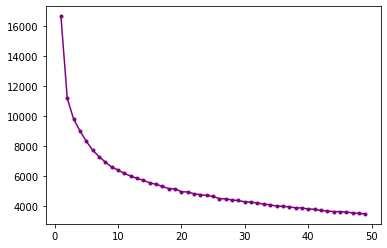

In [8]:
import matplotlib.pyplot as plt
plt.plot(spread, distortions, marker = ".", c = "purple")
plt.show

In [10]:
clusters = KMeans(n_clusters = 10, tol = 0.01, random_state = 0).fit_predict(df1)

df1["clusters"] = clusters.tolist()

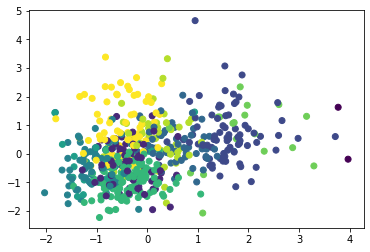

In [16]:
plt.scatter(df1["radius_mean"],df1["texture_mean"], c = df1.clusters)

In [69]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df2['sex'])
df2['sex']= encoder.transform(df2['sex'])

encoder.fit(df2['region'])
df2['region']= encoder.transform(df2['region'])

encoder.fit(df2['smoker'])
df2['smoker']= encoder.transform(df2['smoker'])

In [72]:
X=df2
from sklearn.preprocessing import StandardScaler
encoded_X = StandardScaler().fit_transform(X)
print(encoded_X)

[[-1.43876426 -1.0105187  -0.45332    ...  1.97058663  1.34390459
   0.2985838 ]
 [-1.50996545  0.98959079  0.5096211  ... -0.5074631   0.43849455
  -0.95368917]
 [-0.79795355  0.98959079  0.38330685 ... -0.5074631   0.43849455
  -0.72867467]
 ...
 [-1.50996545 -1.0105187   1.0148781  ... -0.5074631   0.43849455
  -0.96159623]
 [-1.29636188 -1.0105187  -0.79781341 ... -0.5074631   1.34390459
  -0.93036151]
 [ 1.55168573 -1.0105187  -0.26138796 ...  1.97058663 -0.46691549
   1.31105347]]


In [75]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(encoded_X)
    kmeanModel.fit(encoded_X)
    distortions.append(kmeanModel.inertia_)
    
print (distortions)


[9366.0, 7190.047292076327, 6124.909858706683, 5593.82444042839, 5156.0185629845255, 4745.531457141256, 4397.985775564739, 4116.140472550637, 3941.230151995197, 3737.2293656176453, 3562.687238136953, 3449.3964809365425, 3302.777772836212, 3204.9738452423635, 3067.265425917715, 2963.333750176684, 2869.072973695622, 2763.7024035132786, 2655.7565267948003]


<function matplotlib.pyplot.show(*args, **kw)>

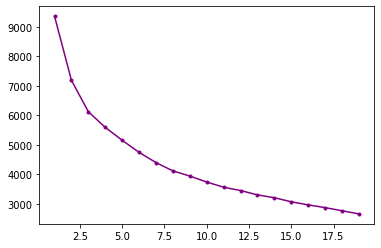

In [77]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, marker = ".", c = "purple")
plt.show

In [60]:
clusters = KMeans(n_clusters = 10, tol = 0.01, random_state = 0).fit_predict(df2)

model = KMeans(n_clusters = 10, tol = 0.01, random_state = 0)
model.fit(df2)
print(model.inertia_)

print("inertia")

df2["clusters"] = clusters.tolist()

2266060754.799388
inertia


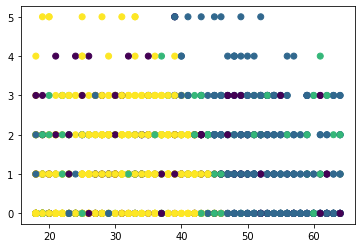

In [55]:
plt.scatter(df2["age"],df2["children"], c = df2.clusters)

In [38]:
from sklearn.cluster import MeanShift

distortions_3 = []
bandwidth = range(1,20)

bandwidth = 100

#for k in bandwidth:
    mean_shift= MeanShift(bandwidth = 10)
    mean_shift.fit(df2)
    clusters = mean_shift.predict(df2)
    distortions_3.append(model.inertia_)

    
print (distortions_3)

IndentationError: unexpected indent (<ipython-input-38-0032c30c05fb>, line 9)

<function matplotlib.pyplot.show(*args, **kw)>

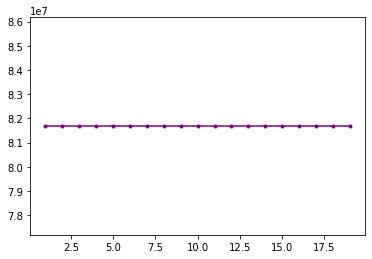

In [36]:


import matplotlib.pyplot as plt
plt.plot(bandwidth, distortions_3, marker = ".", c = "purple")
plt.show

In [31]:
bandwidth

range(0, 10)

In [44]:
    mean_shift= MeanShift(bandwidth = 0.001)
    mean_shift.fit(df2)
    clusters = mean_shift.predict(df2)
    print(model.inertia_)

81682092.55429034


number of estimated clusters : 1337
number of estimated clusters : 1337
number of estimated clusters : 1337
[3 1 1 2 2]
k:  1  inertia:  7036.690582959576  Distance:  2.2903210383077357
k:  2  inertia:  6363.010904735517  Distance:  2.177348949877279
k:  3  inertia:  6057.566100118617  Distance:  2.1262953985210813
k:  4  inertia:  5887.611006150298  Distance:  2.0951162743824976
k:  5  inertia:  5743.009451178024  Distance:  2.068117527846577
k:  6  inertia:  5585.730746214161  Distance:  2.0397740487709863
k:  7  inertia:  5546.126185091453  Distance:  2.0312870935939453
k:  8  inertia:  5410.749028166716  Distance:  2.0066332420632587
k:  9  inertia:  5286.283889139247  Distance:  1.9850144786355088


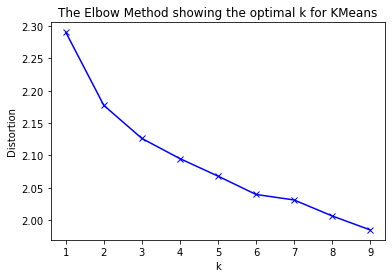

In [82]:
X=df
from sklearn.preprocessing import OneHotEncoder
X = OneHotEncoder().fit_transform(X).toarray()


#trying Mean shift with different bandwidth
from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=0.5).fit_predict(encoded_X)
ms = MeanShift(bandwidth=0.5, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=0.25).fit_predict(encoded_X)
ms = MeanShift(bandwidth=0.25, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=1).fit_predict(encoded_X)
ms = MeanShift(bandwidth=1, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



from sklearn.cluster import KMeans
clusters2 = KMeans(n_clusters=4, tol=1e-5, random_state=0).fit_predict(encoded_X)

print(clusters2[0:5])


#drawing elbow curve for Kmeans algorithm

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('k: ',k,' inertia: ',kmeanModel.inertia_,' Distance: ',sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for KMeans')
plt.show()
